# Formatting the Dataset 

In [13]:
import os
import pandas as pd

DATA_DIR = "dataset/cells/"
OUTPUT_DIR = "dataset/cells2/train/"
CSV_PATH = "dataset/label.csv"

df = pd.read_csv(CSV_PATH)
images = df['image_name'].to_numpy()
labels = df['label'].to_numpy()
for imagename,label in zip(images,labels):
    IMG_PATH = DATA_DIR + imagename
    OUT_IMG_PATH = OUTPUT_DIR + str(label)

    if not os.path.isdir(OUT_IMG_PATH):
        os.mkdir(OUT_IMG_PATH)

    os.system('cp {} {}'.format(IMG_PATH,os.path.join(OUT_IMG_PATH,imagename)))    
    
    

# Importing Libraries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

2023-06-09 23:16:23.654478: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 23:16:23.728337: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 23:16:24.295978: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 23:16:24.298769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 23:16:27.949143: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# Configurations

In [7]:
BATCH_SIZE = 32
OUTPUT_DIR = "dataset/cells2/train/"
IMG_SHAPE = (64,64)
EPOCHS = 10
SEED =42
NUM_CLASSES = 6


# Generating Training and Validation data

In [19]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    OUTPUT_DIR,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    OUTPUT_DIR, # same directory as training data
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,
    subset='validation') # set as validation data

Found 50758 images belonging to 6 classes.
Found 12687 images belonging to 6 classes.


# Convolutional Neural Network Layers


In [20]:

model = tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', 
                        input_shape=(64, 64, 3)),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
# tf.keras.layers.Dropout(0.2),

tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

tf.keras.layers.Dropout(0.2),
tf.keras.layers.Flatten(),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(128, activation='relu'),

tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])



# Optimizer and Loss Function


In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.002),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


# Training and Validating

In [22]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps= validation_generator.samples // BATCH_SIZE,
                    verbose=1
                    )



Epoch 1/10


2023-06-09 23:40:17.916287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1586/1586 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.7548

2023-06-09 23:41:35.204405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1586/1586 [==============================] - 88s 54ms/step - loss: 0.6372 - accuracy: 0.7548 - val_loss: 0.6559 - val_accuracy: 0.7529
Epoch 2/10
1586/1586 [==============================] - 86s 54ms/step - loss: 0.3942 - accuracy: 0.8540 - val_loss: 0.6674 - val_accuracy: 0.7332
Epoch 3/10
1586/1586 [==============================] - 82s 52ms/step - loss: 0.3189 - accuracy: 0.8827 - val_loss: 0.6840 - val_accuracy: 0.7386
Epoch 4/10
1586/1586 [==============================] - 83s 52ms/step - loss: 0.2824 - accuracy: 0.8963 - val_loss: 0.5360 - val_accuracy: 0.7783
Epoch 5/10
1586/1586 [==============================] - 86s 54ms/step - loss: 0.2592 - accuracy: 0.9062 - val_loss: 0.9080 - val_accuracy: 0.7273
Epoch 6/10
1586/1586 [==============================] - 86s 54ms/step - loss: 0.2418 - accuracy: 0.9118 - val_loss: 0.5692 - val_accuracy: 0.8028
Epoch 7/10
1586/1586 [==============================] - 86s 54ms/step - loss: 0.2272 - accuracy: 0.9165 - val_loss: 0.6054 - val_accura

# Plotting the Data

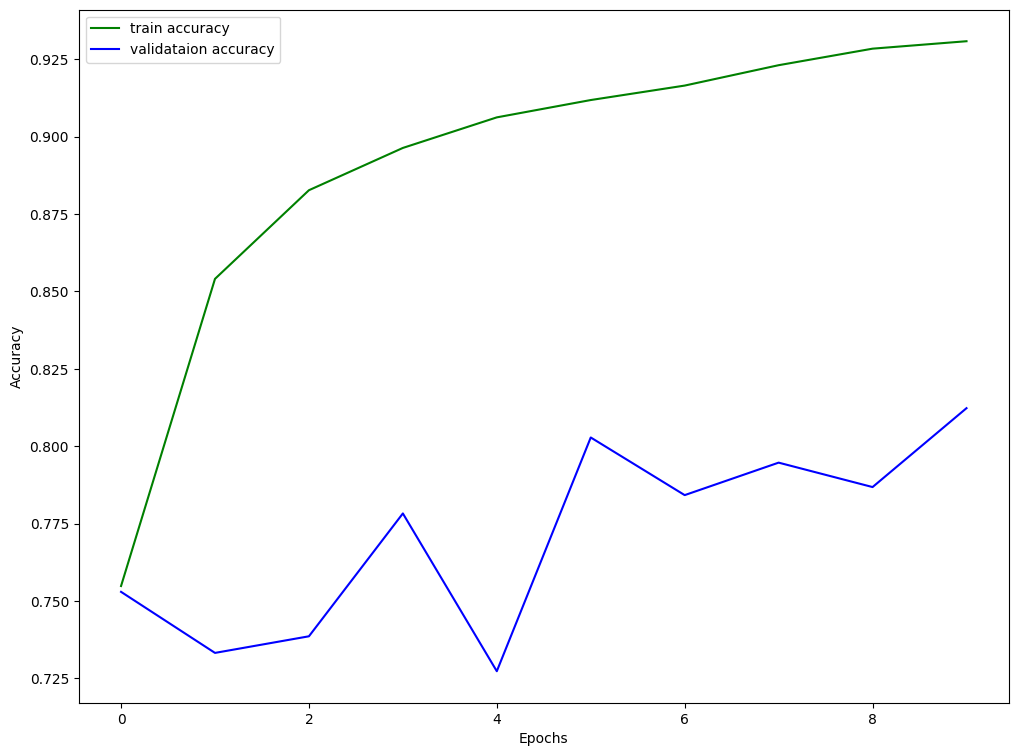

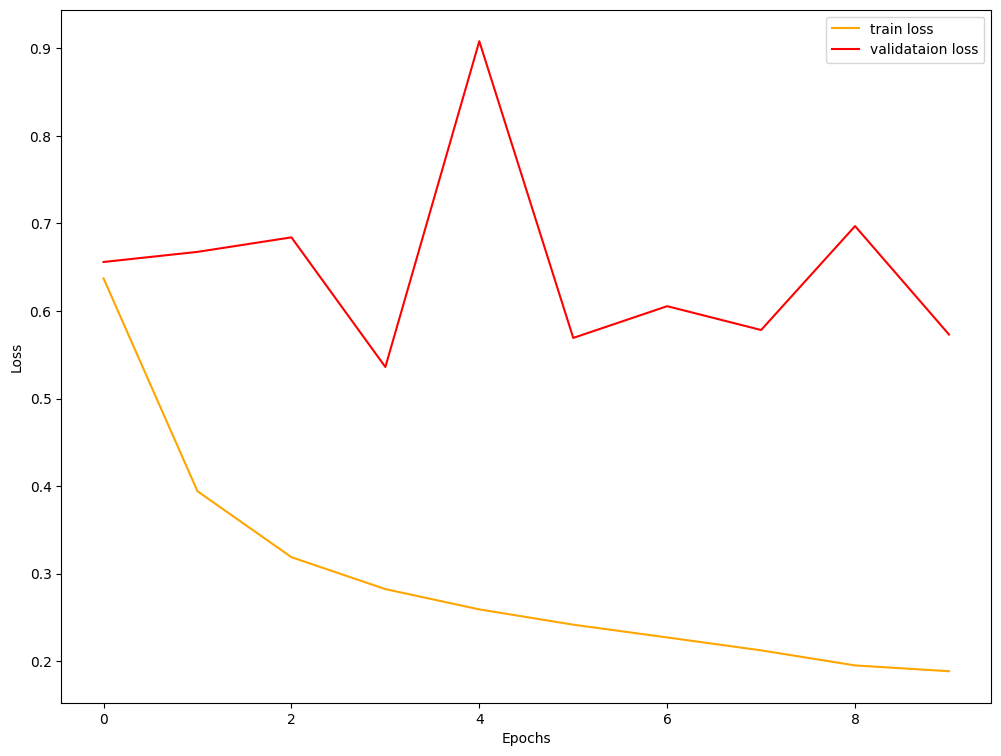

In [23]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()
save_plots(train_acc, valid_acc, train_loss, valid_loss)


# Report
### Validation Data
1. Max Accuracy:- 0.8123
2. Min Loss:- 0.5360

### Training Data
1. Max Accuracy:- 0.9308
2. Min Loss:- 0.1886

### Possible Ways to Increase the accuracy
1. Increase the number of convolutional layers
2. Increase the filter map in convolutional layer and nodes in Dense layer
3. Increase Number of epochs 